In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
path = "D:\Data-Science-Working\Project_1"
filename = 'googleplaystore.csv'


def collect_data(path,fileame):
    data = pd.read_csv(path+'/'+filename)
    return data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\abc\AppData\Local\Temp\ipykernel_28924\1789903394.py:1: SyntaxWarning: invalid escape sequence '\D'
  path = "D:\Data-Science-Working\Project_1"


In [27]:
data = collect_data(path,filename)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
def get_stats(data):
    print(data.info())  # used to show the columns and data types
    print('\n')
    print('Dataframe Shape:{}',format(data.shape)) # used to show rows and columns
    print('\n')
    print('Missing Values are:')
    print('\n')
    print(data.isnull().sum()) # calculates the missing values in each column
    print('\n')
    print('data type features are:')
    print(data.dtypes) # shows the data type of each column

get_stats(data)

"""
after getting the information from the dataframe we have to check whether any incorrect
value is place in any column or not for that we do multiple types of checking with respect
to the columns for eg:
checking incorrect values in Rating column or price column or Genres etc
""" 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Dataframe Shape:{} (10841, 13)


Missing Values are:


App                  0
Category             0
Rating            1474
Reviews              0
Size     

'\nafter getting the information from the dataframe we have to check whether any incorrect\nvalue is place in any column or not for that we do multiple types of checking with respect\nto the columns for eg:\nchecking incorrect values in Rating column or price column or Genres etc\n'

In [29]:
data[data['Rating']<0] # this shows we dont have any negative value in rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [30]:
data[data['Rating']>5]  

"""
this shows we have rating above than 5 which is incorrect as maximum rating is 5
plus Genres has a date where it should be different
therefore we shift data to right for making it correct
we have to shift the from category column leaving the first as it is
"""

data.iloc[10472,1:] # this shows the value of a particular column

Category                        1.9
Rating                         19.0
Reviews                        3.0M
Size                         1,000+
Installs                       Free
Type                              0
Price                      Everyone
Content Rating                  NaN
Genres            February 11, 2018
Last Updated                 1.0.19
Current Ver              4.0 and up
Android Ver                     NaN
Name: 10472, dtype: object

In [31]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1) # this will move the data one place to right from the category column
data.iloc[10472,1:] # after the above the output shows the change
data.iloc[10472].dtype

C:\Users\abc\AppData\Local\Temp\ipykernel_28924\2980510327.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[10472,1:] = data.iloc[10472,1:].shift(1) # this will move the data one place to right from the category column


dtype('O')

In [32]:
data[data['Rating']>5] 
"""
this will show error as we have shifted the value to right due to which
the datatype is changed from float to Object type 
which will not allow it to run the code and produce an error
now we will have to do feature engineering 
as the date in Last Updated Column is in string form and ML Model understand only number
or integer
"""


TypeError: '>' not supported between instances of 'str' and 'int'

In [33]:
"""What we will do now is take the month and year individually in 2 new columns """
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

In [34]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated'].dtype

dtype('<M8[ns]')

In [35]:
data['Year_added']=data['Last Updated'].dt.year
data['Month_added']=data['Last Updated'].dt.month
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year_added,Month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [36]:
data['Type'].isna().sum()

np.int64(1)

In [37]:
data.dropna(subset=['Type'],inplace=True)

In [38]:
data['Type'].isna().sum()

np.int64(0)

In [39]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [40]:
label = data['Type'].value_counts().index

In [41]:
values = data['Type'].value_counts().values

In [42]:
import plotly.express as px

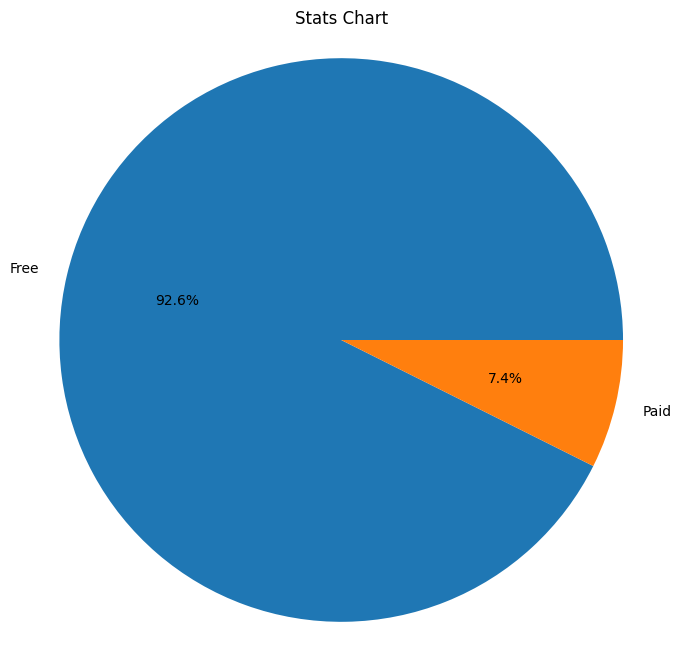

In [43]:
plt.figure(figsize=(8,8))
plt.pie(values,labels=label,autopct='%1.1f%%')
plt.title('Stats Chart')
plt.axis('Equal')
plt.show()

In [44]:
# data['Type']=='Free' --> this is a filter to check the number of users using free services
df1 = data[data['Type']=='Free'] # We passed the filter to the dataframe 1
df2 = data[data['Type']=='Paid'] # We passed the Second filter to the dataframe 2

In [45]:
# df1['Year_added'].value_counts() -->first we check the values in the particular column
free = df1['Year_added'].value_counts().reset_index() # then we converted it into a dataframe and stored it into a variable 

In [46]:
free # now we need to change the name of tne columns

,Year_added,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [47]:
free.columns=['Year','Count']
free # names of column are changed

,Year,Count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [48]:
paid = df2['Year_added'].value_counts().reset_index()
paid

,Year_added,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [49]:
paid.columns=['Year','Count']
paid # names of column are changed

,Year,Count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


Now if we can see there is a difference in the year of Paid Dataframe and Free DataFrame
the difference is that the year in free starts from 2010 and in Paid it starts from 2011
so we will have to add a year and count in Paid so that both dataframe have similar rows and columns

In [50]:
row =pd.DataFrame({'year':[2010],'count':[0]})
paid= pd.concat([paid,row],ignore_index=True)
paid

,Year,Count,year,count
0,2018.0,345.0,NaN,NaN
1,2017.0,183.0,NaN,NaN
2,2016.0,94.0,NaN,NaN
3,2015.0,82.0,NaN,NaN
4,2014.0,59.0,NaN,NaN
5,2013.0,29.0,NaN,NaN
6,2012.0,5.0,NaN,NaN
7,2011.0,3.0,NaN,NaN
8,NaN,NaN,2010.0,0.0


In [51]:
paid = paid.drop(['year','count'],axis=1) # added two new columns which I had to remove 
paid

,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0
8,NaN,NaN


In [52]:
paid = paid.drop(8)
paid


,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0


In [ ]:

paid

,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0
9,2010.0,0.0


In [53]:
paid = paid.rename(index={9:8})
paid

,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0


In [54]:
print('the count with respect to year in Paid is:')
paid


the count with respect to year in Paid is:


,Year,Count
0,2018.0,345.0
1,2017.0,183.0
2,2016.0,94.0
3,2015.0,82.0
4,2014.0,59.0
5,2013.0,29.0
6,2012.0,5.0
7,2011.0,3.0


In [55]:
print('the count with respect to year in Free is:')
free

the count with respect to year in Free is:


,Year,Count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [56]:
import chart_studio as cs
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [57]:
trace1 = go.Scatter(x=free['Year'],y=free['Count'])
trace2 = go.Scatter(x=paid['Year'],y=paid['Count'])

In [58]:
y=(trace1,trace2)

In [59]:
layout = {
    'title':'app updated or added over the years',
    'xaxis':{'title':'Years'}
}

In [60]:
fig = go.Figure(data=y)
iplot(fig) # the output of the code is not shown due to some error else it shows a graph

In [61]:
# now we need to write a code which automates the function 
def mystats(dataframe,feature,column1,column2):
    df = dataframe[feature].value_counts().reset_index()
    df.columns = [column1,column2]
    return df

In [62]:
mystats(df1,'Year_added','Year','Count')

,Year,Count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [63]:
mystats(df2,'Year_added','Year','Count')

,Year,Count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [64]:
def need_visuals(df1=None,df2=None,col1=None,col2=None,dict_title=None,visual='scatter'):
    if visual == 'scatter':
        trace1 = go.Scatter(x=df1[col1],y=df1[col2])
        trace2 = go.Scatter(x=df2[col1],y=df2[col2])
        y = [trace1,trace2]
        layout=dict_title
        fig = go.Figure(data=y,layout=layout)
        return iplot(fig)
    else:
        return px.bar(df1,x=col1,y=col2)


In [66]:
free = mystats(df1,'Year_added','year','count')
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1
